In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def change_bit(vector,n):  ##將第n位從0轉成1或者從1轉成0 
  vector = list(vector)
  vector[n] = str(int(not bool(int(vector[n]))))
  return ''.join(vector)

def return_value(vector):  ##隨機選擇1位轉換01然後返回值二進制
  bit = random.randint(0,99)
  return change_bit(vector, bit)

def evaluate(vector1, vector2): 
    return vector1.count("1") <= vector2.count("1") ##判斷新的solution是否好過當前的最優解

def Tabu_list_update(Tabu_list, new_solution, maximum_length = 7): ##按照Queue的方式更新Tabu list
  Tabu_list.append(new_solution)
  if len(Tabu_list) > maximum_length:
    return Tabu_list[1:]
  else:
    return Tabu_list

def return_not_tabu_value(vector, Tabu_list): ##生成一個不在給出的Tabu list中的新解
  for i in range(8):
    new_solution = return_value(vector)
    if new_solution not in Tabu_list:
      return new_solution


In [ ]:
max_iteration = 1000
max_run = 30
record = np.zeros((max_run, max_iteration), dtype='int') ##紀錄信息
for i in range(max_run):
  vector = bin(random.randint(0,int("1"*100, 2)))[2:].zfill(100) ##隨機生成數字轉換成2進制作為初始變量
  Tabu_list = [] ##初始化Tabu list
  for j in range(max_iteration):
    new_solution = return_not_tabu_value(vector, Tabu_list) ##生成新的不在Tabu list的解
    if not evaluate(new_solution, vector): ##若生成的解比較好，則儲存在Tabu list中
      vector = new_solution
      Tabu_list = Tabu_list_update(Tabu_list, new_solution)
    record[i,j] = vector.count("1") ##紀錄每次iteartaion產生的解

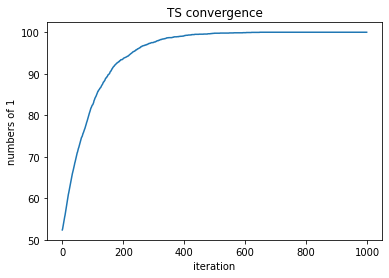

In [ ]:
average_record = np.mean(record, axis = 0) ##取30次平均
plt.title('TS convergence')
plt.xlabel('iteration')
plt.ylabel('numbers of 1')
plt.plot(range(max_iteration), average_record, '-') ##畫出收斂圖

In [ ]:
for one in record:
  print(one)

[ 57  58  58  58  59  60  60  61  61  62  62  62  62  63  64  65  65  66
  67  68  68  69  69  70  70  70  70  70  70  70  71  71  72  73  73  73
  73  73  73  73  74  75  75  76  76  76  77  77  78  79  79  80  80  80
  80  80  81  81  81  81  81  82  82  82  82  82  82  82  82  82  82  82
  82  83  83  84  84  84  84  84  84  85  86  86  86  86  86  86  86  86
  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86
  86  86  86  87  88  88  88  88  88  88  88  88  88  89  89  89  89  90
  90  90  90  90  90  90  91  91  91  91  91  91  91  92  92  92  92  92
  92  92  92  92  93  93  93  93  93  94  94  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96
  96  96  96  96  96  96  96  96  96  96  96  96  9